In [11]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py

In [5]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable


In [19]:
# import the data; data comes from NOAA

global_temp = pd.read_csv('Global_temp.csv', index_col=0, header=0)
global_gas = pd.read_excel('Global_Greenhouse_Gas.xls', index_col=0, header=3).fillna(0)

In [17]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [21]:
global_temp.head()

,Value,Anomaly
Date,,
1970,51.59,-0.39
1971,51.52,-0.46
1972,51.59,-0.39
1973,51.53,-0.45
1974,51.88,-0.10


In [23]:
global_gas.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15272.6330,15288.7756,15554.429500,17791.329902,17981.307287,0.000000,0.0,0.0,0.0,0.0
Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36690.5340,37396.2940,38309.465126,40029.392101,40878.651958,41657.164846,0.0,0.0,0.0,0.0
Albania,ALB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9879.3935,8136.7850,8108.812387,8506.996034,8712.296365,8898.640911,0.0,0.0,0.0,0.0
Andorra,AND,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [25]:
cols = []
for i in range(1970,2013):
    cols.append(str(i))

cols

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012']

In [27]:
global_gas = global_gas[cols[:len(cols)]]
global_gas.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,42.306298,42.786948,43.286613,43.72459,44.130957,44.481908,131.633746,135.055319,358.990001,409.505485,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000
Afghanistan,14306.616300,14391.778200,13040.848000,13535.75410,14945.968200,14574.164000,14746.851000,15247.281000,15112.318000,14923.075000,...,14709.8840,14654.37400,14770.2643,14849.15940,15272.6330,15288.7756,15554.429500,17791.329902,17981.307287,0.000000
Angola,60648.601080,39162.171430,42205.650700,44252.66912,40179.233500,44429.300030,38448.024090,43563.412180,46235.114580,56644.651970,...,35858.0150,36860.23340,35855.7384,36375.82200,36690.5340,37396.2940,38309.465126,40029.392101,40878.651958,41657.164846
Albania,6960.868200,6950.036100,7613.266100,7348.49210,7632.664300,7873.037000,8470.978400,8948.980900,9996.056200,11248.358300,...,7834.0157,7401.10155,8308.3856,8027.14955,9879.3935,8136.7850,8108.812387,8506.996034,8712.296365,8898.640911
Andorra,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000


In [29]:
state_gas = pd.read_excel('State_Carbon_dioxide.xlsx', header=4)
state_gas = state_gas.drop(['percent', 'absolute'], axis=1).dropna()

In [31]:
state_gas.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AL,142.21,133.58,138.43,139.30,141.62,143.27,145.72,147.37,139.57,120.04,132.71,129.87,123.15,120.87,123.21
1,AK,44.32,43.40,43.56,43.62,46.75,48.05,45.76,44.04,39.43,37.79,38.66,38.53,37.99,36.25,35.05
2,AZ,86.07,88.43,87.76,89.61,96.61,96.69,99.93,101.88,102.26,93.42,95.25,93.31,91.31,95.14,93.14
3,AR,63.69,62.87,61.39,62.08,62.44,60.18,62.06,63.39,64.23,61.57,65.90,67.34,66.12,68.44,68.99
4,CA,382.37,386.83,386.01,373.77,392.21,389.44,397.61,402.62,385.78,372.08,366.00,352.36,357.23,360.46,357.98


In [40]:
# for a given year, let's determine the top 10 emitters

def top_ten(year, total=10):
    df = global_gas[year]
    top = df.sort_values(ascending=False)
    top = top.reset_index().head(total)
    top.index = top.index + 1
    return top

In [48]:
top_ten('2010')

,Country Name,2010
1,China,1.118381e+07
2,United States,6.713349e+06
3,Brazil,2.902243e+06
4,India,2.771457e+06
5,Russian Federation,2.603290e+06
6,Japan,1.350428e+06
7,Germany,9.480068e+05
8,"Congo, Dem. Rep.",7.992287e+05
9,Australia,7.821027e+05
10,Canada,7.641377e+05


In [104]:
def pie_plot(year):
    df = global_gas[year]
    top = df.sort_values(ascending=False)
    top = top.reset_index()
    top.index = top.index + 1
    others = top[10:].sum()[1]
    top = top[:10]
    top.loc[11] = ['All Other Countries', others]

    country_plot = top[year].plot.pie(
                                        subplots=True,
                                        autopct='%0.1f',
                                        fontsize=10,
                                        figsize=(10,10),
                                        legend=False,
                                        labels=top['Country Name'],
                                        shadow=False,
                                        explode=(0.15,0,0,0,0,0,0,0,0,0,0),
                                        startangle=90
    )

C:\Users\capta\AppData\Local\Temp\ipykernel_13652\1805974701.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  others = top[10:].sum()[1]


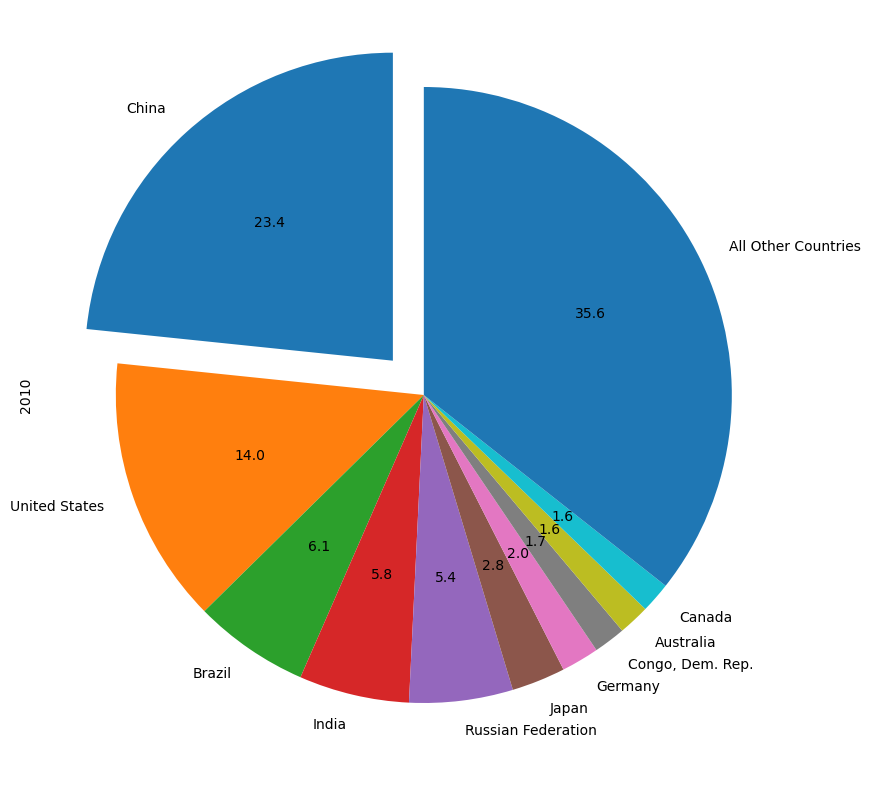

In [108]:
pie_plot('2010')
plt.show()

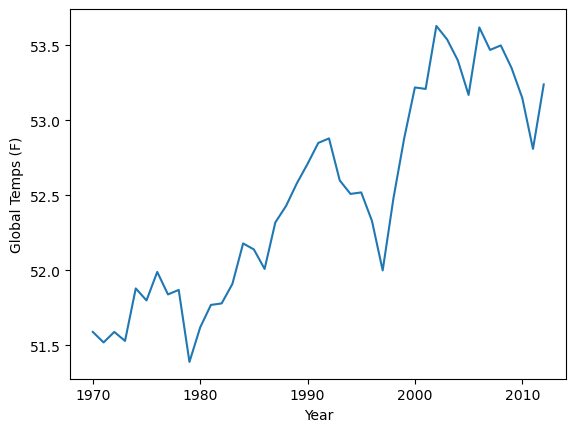

In [116]:
# show the global temps over time

ax = global_temp['Value'].plot()
ax.set_xlabel('Year')
ax.set_ylabel('Global Temps (F)')
plt.show()

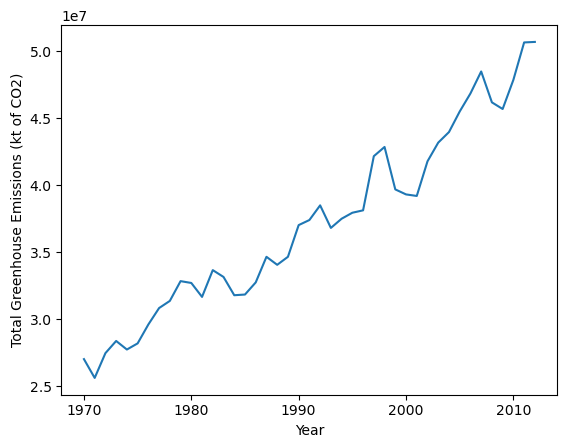

In [124]:
# let take a look at emission over time

ax = global_gas.sum().plot()
ax.set_xlabel('Year')
ax.set_ylabel('Total Greenhouse Emissions (kt of CO2)')
plt.show()

In [126]:
#calculate the correlation coefficient between the two

x = global_gas.sum()
y = global_temp.reset_index()['Value']

top = 0
b1 = 0
b2 = 0
for i in range(len(x)):
    top = (x[i]-x.mean()) * (y[i]-y.mean()) + top
    b1 = (x[i]-x.mean())**2 + b1
    b2 = (y[i]-y.mean())**2 + b2
    
r = top/(math.sqrt(b1)*math.sqrt(b2))
r

C:\Users\capta\AppData\Local\Temp\ipykernel_13652\2342991210.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top = (x[i]-x.mean()) * (y[i]-y.mean()) + top
C:\Users\capta\AppData\Local\Temp\ipykernel_13652\2342991210.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = (x[i]-x.mean())**2 + b1


0.8509743367858839

In [128]:
import plotly.graph_objects as go

In [150]:
# for a given year, plot the states greenhouse emissions using plotly

scale = [[0.0, 'rgb(223,221,228)'], 
         [0.2, 'rgb(199,199,201)'],
         [0.4, 'rgb(169,170,201)'], 
         [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'], 
         [1.0, 'rgb(63,20,122)']]

def mapper(year):     
    fig = go.Figure(data=go.Choropleth(
        locations = state_gas['State'],
        z = state_gas[int(year)],
        text=state_gas['State'],
        locationmode='USA-states',
        colorscale=scale,
        autocolorscale=False,
        reversescale=False,
        marker_line_color='rgb(255,255,255)',
        marker_line_width=2,
        colorbar_tickprefix = '',
        colorbar_title = 'Million Metric Tons CO2 In ' + str(year)
    ))

    fig.update_layout(
    title_text = 'State Energy-related CO2 Emissions In ' + 
                 str(year) + '<br>Hover for value',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        showlakes=True,
        lakecolor='rgb(95,145,237)',
        projection_type='albers usa') #try equirectangular
    
    ,annotations = [dict(
        x=0.7, #from left between 0-1
        y=0.05, #from bottom between 0-1
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.noaa.gov/">NOAA</a>',
        showarrow = False
        )]
    )
    fig.show()

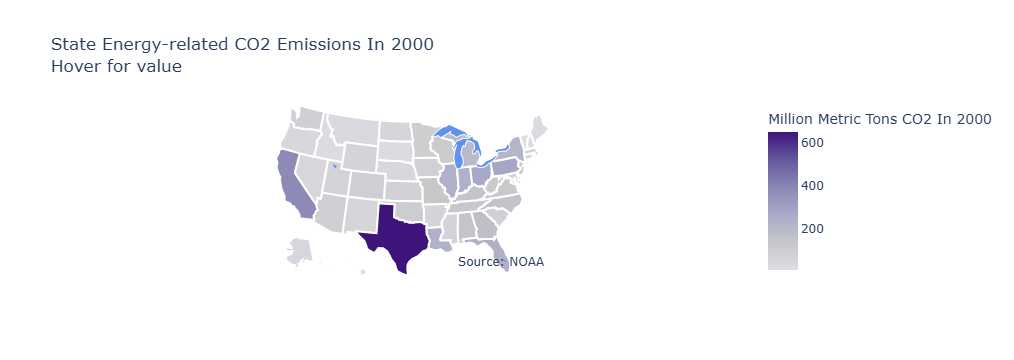

In [154]:
mapper(2000)